# Exploring ML Algorithms
Dataset - Housing

Scenario: We need to Predict the price of a Diamond by different features.

<b>INDEX</b>

SA - Add a picture






##  EDA, Profiling

### Importing all required Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
# allow plots to appear direcly in the notebook
%matplotlib inline
plotly.tools.set_credentials_file(username='sudhakar.anemu', api_key='gsV5SUHPip75363I87dw')
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
print("Import completed")

Import completed


### Read the required Dataset

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-2/master/Projects/house_data.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Understanding about the Dataset

In [22]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Shape of the Dataset : ", df.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Columns of the data frame : ",df.columns)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Info of the Dataset : ", df.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Description of the Dataset : ", df.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Verify the count of Null", df.isnull().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the Dataset :  (1460, 80)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns of the data frame :  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
  

1. Dataset has 1460 observations and 80 features.
2. Observed more null values with respect to the features. 
3. Ultimately we need to identify the price of the House
4. We need to identify the features for futher analysis. It is the first challenge.



### Features vs Descriptions. 


S.No | Feature | Descripton|Consider|
-|----------------|---------------|----|
1|MSSubClass|The building class|Ignore|
2|MSZoning|The general zoning classification|Ignore/later consider|
3|LotFrontage|Linear feet of street connected to property|Ignore|
4|LotArea: Lot size in square feet|Ignore|
5|Street: Type of road access|Ignore|
6|Alley: Type of alley access|Ignore|
7|LotShape: General shape of property|Ignore|
8|LandContour: Flatness of the property|Ignore|
9|Utilities: Type of utilities available|Ignore|
10|LotConfig: Lot configuration|Ignore|
11|LandSlope: Slope of property|Ignore|
12|Neighborhood: Physical locations within Ames city limits|Ignore|
13|Condition1: Proximity to main road or railroad|Ignore|
14|Condition2: Proximity to main road or railroad (if a second is present)|Ignore|
15|BldgType: Type of dwelling|Ignore|
16|HouseStyle: Style of dwelling|Ignore|
17|OverallQual: Overall material and finish quality|Ignore|
18|OverallCond: Overall condition rating|Ignore|
19|YearBuilt: Original construction date|Ignore|
20|YearRemodAdd: Remodel date|Ignore|
21|RoofStyle: Type of roof|Ignore|
22|RoofMatl: Roof material|Ignore|
23|Exterior1st: Exterior covering on house|Ignore|
24|Exterior2nd: Exterior covering on house (if more than one material)|Ignore|
25|MasVnrType: Masonry veneer type|Ignore|
26|MasVnrArea: Masonry veneer area in square feet|Ignore|
27|ExterQual: Exterior material quality|Ignore|
28|ExterCond: Present condition of the material on the exterior|Ignore|
29|Foundation: Type of foundation|Ignore|
30|BsmtQual: Height of the basement|Ignore|
31|BsmtCond: General condition of the basement|Ignore|
32|BsmtExposure: Walkout or garden level basement walls|Ignore|
33|BsmtFinType1: Quality of basement finished area|Ignore|
34|BsmtFinSF1: Type 1 finished square feet|Ignore|
35|BsmtFinType2: Quality of second finished area (if present)|Ignore|
36|BsmtFinSF2: Type 2 finished square feet|Ignore|
37|BsmtUnfSF: Unfinished square feet of basement area|Ignore|
38|TotalBsmtSF: Total square feet of basement area|Ignore|
39|Heating: Type of heating|Ignore|
40|HeatingQC: Heating quality and condition|Ignore|
41|CentralAir: Central air conditioning|Ignore|
42|Electrical: Electrical system|Ignore|
43|1stFlrSF: First Floor square feet|Ignore|
44|2ndFlrSF: Second floor square feet|Ignore|
45|LowQualFinSF: Low quality finished square feet (all floors)|Ignore|
46|GrLivArea: Above grade (ground) living area square feet|Ignore|
47|BsmtFullBath: Basement full bathrooms|Ignore|
48|BsmtHalfBath: Basement half bathrooms|Ignore|
49|FullBath: Full bathrooms above grade|Ignore|
50|HalfBath: Half baths above grade|Ignore|
51|Bedroom: Number of bedrooms above basement level|Ignore|
52|Kitchen: Number of kitchens|Ignore|
53|KitchenQual: Kitchen quality|Ignore|
54|TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)|Ignore|
55|Functional: Home functionality rating|Ignore|
56|Fireplaces: Number of fireplaces|Ignore|
57|FireplaceQu: Fireplace quality|Ignore|
58|GarageType: Garage location|Ignore|
59|GarageYrBlt: Year garage was built|Ignore|
60|GarageFinish: Interior finish of the garage|Ignore|
61|GarageCars: Size of garage in car capacity|Ignore|
62|GarageArea: Size of garage in square feet|Ignore|
63|GarageQual: Garage quality|Ignore|
64|GarageCond: Garage condition|Ignore|
65|PavedDrive: Paved driveway|Ignore|
66|WoodDeckSF: Wood deck area in square feet|Ignore|
67|OpenPorchSF: Open porch area in square feet|Ignore|
68|EnclosedPorch: Enclosed porch area in square feet|Ignore|
69|3SsnPorch: Three season porch area in square feet|Ignore|
70|ScreenPorch: Screen porch area in square feet|Ignore|
71|PoolArea: Pool area in square feet|Ignore|
72|PoolQC: Pool quality|Ignore|
73|Fence: Fence quality|Ignore|
74|MiscFeature: Miscellaneous feature not covered in other categories|Ignore|
75|MiscVal: $Value of miscellaneous feature|Ignore|
76|MoSold: Month Sold|Ignore|
77|YrSold: Year Sold|Ignore|
78|SaleType: Type of sale|Ignore|
79|SaleCondition: Condition of sale|Ignore|

### Unique values under each column, by this we can understand the columns by data perspective.

In [23]:
colList = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("Name of the column : ",colList[i])
    print(df[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 2 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 3 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 12

### Here is the preprofiling information and observations. 
1. sss
2.ssss
4.....
5....

SA - add profile html file here

1. Dataset information from pre-profiling.

Number of variables	81
Number of observations	1460
Total Missing (%)	5.9%
Total size in memory	924.0 KiB
Average record size in memory	648.1 B
Variables types :
Numeric	38
Categorical	43
Boolean	0
Date	0
Text (Unique)	0
Rejected	0 (It is very difficult since Rejected is Zero, so that we need to manually identify which are all features needs to identify for furrther analysis.)
Unsupported	0


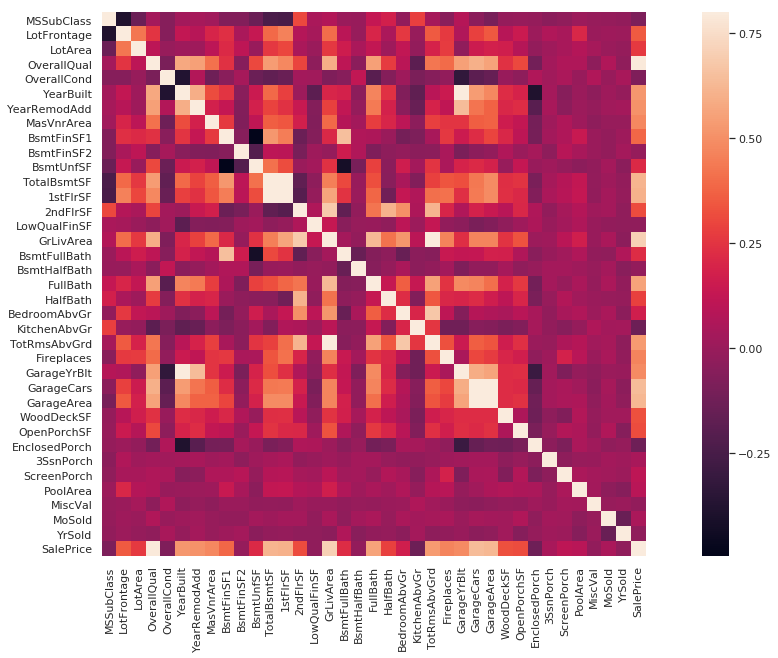

In [24]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.8, square=True);

Names of columns :  Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


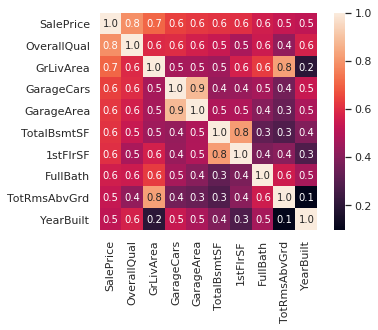

In [25]:
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index #Finding 10 larget columns from the SalePriceColumn
print("Names of columns : ", cols)
cm = np.corrcoef(df[cols].values.T) #It will give value of correlation coefficient
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#sns.heatmap( df.corr(), annot=True );

### Below features are selected as part of predicting Salce Price. 

A. Below features are identified based on correlation with Salels price. 


1. OverallQual
2. Year Built
3. Year Remod Aadd
4. MasVnrArea
5. BsmtFinSfF1
6. TotalBsmtSF
7. 1stFlrSF
8. GrLiveArea
9. FullBath
10. TotRmsAbvGrd
11. GarageyRBlt
12. GarageCars
13. GarageArea

B. Below are finalyzed for futher analysis to predict the SalePrice

1. SalePrice
2. OverallQual is strongly correlated with SlalePrice
3. GrLivArea is strongly correlated with SlalePrice
4. GarageCars (GarageCars, GarageArea both are same so we selected GarageCars alone)
5. TotalBsmtSF (TotalBsmtSF and 1stFloor are same so we selected TotalBsmtSF)
6. FullBath
7. YearBuilT

### Lets analyze the Salesprice feature

In [26]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Here are observation's of the SalesPrice column.<br>
a. Min is 34900(it is not very less)<br>
b. Max is 755000(good difference between Min and Max)<br>
c. No missing values

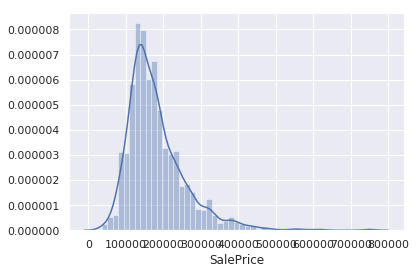

In [27]:
sns.distplot(df['SalePrice'])

Here are Observations of Histogram of the SalePrice<br>
1. Looks Normal distribution so good for nalysis<br>
2. It has Postive skewness(not more so it is good.)<br>
3. Peak of the data was clearly mentioned. 

In [28]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

### Analyze the Indipendent features

Here are indipendent variables. 

1. OverallQual
2. GrLivArea
3. GarageCars
4. TotalBsmtSF
5. FullBath
6. YearBuilT


#### Unique values under each feature

In [29]:
colList = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("Name of the column : ",colList[i])
    print(df[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  OverallQual
[ 7  6  8  5  9  4 10  3  1  2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 2 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  GrLivArea
[1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 132

#### Descriptoin of each features

Objservations : 

1. No missing values on all selected features. 


In [30]:
colList = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("Name of the column : ",colList[i])
    print(df[colList[i]].describe())
    print("--- Inforamtion of the feature ---")
#     print(df[colList[i]].info)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
--- Inforamtion of the feature ---
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 2 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
--- Inforamtion of the feature ---
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 3 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  

**### Creating a new Dataframe from old Dataframe(with respect to the selected features. )**

In [31]:
df1 = pd.DataFrame([df.OverallQual,df.GrLivArea,df.GarageCars,df.TotalBsmtSF,df.FullBath,df.YearBuilt, df.SalePrice]).transpose()
print("First few rows : \n", df1.head(5))
print("Share of the new DataFrame : ", df1.shape)

First few rows : 
     OverallQual  GrLivArea  GarageCars  ...  FullBath  YearBuilt  SalePrice
Id                                      ...                                
1             7       1710           2  ...         2       2003     208500
2             6       1262           2  ...         2       1976     181500
3             7       1786           2  ...         2       2001     223500
4             7       1717           3  ...         1       1915     140000
5             8       2198           3  ...         2       2000     250000

[5 rows x 7 columns]
Share of the new DataFrame :  (1460, 7)


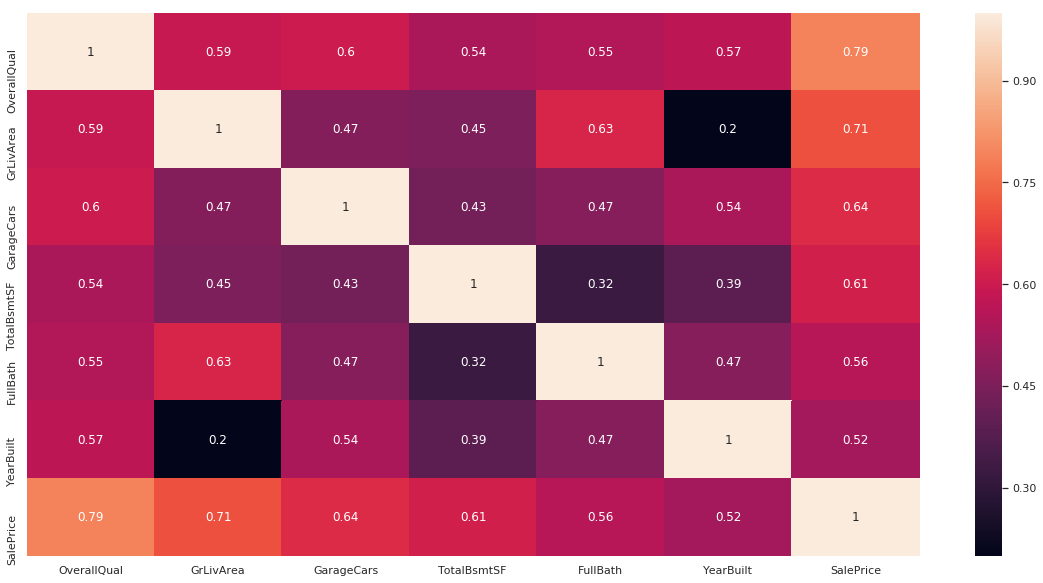

In [32]:
f, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(df1.corr(), vmax=.8, square=True);
sns.heatmap( df1.corr(), annot=True );

In [126]:
print("\nLets take highly corrleated columns for further analysis : GrLivArea, GarageCars and TotalBsmtSF")
dataset = pd.DataFrame([df.OverallQual,df.GrLivArea,df.GarageCars, df.TotalBsmtSF, df.FullBath, df.YearBuilt, df.SalePrice]).transpose()
print("First few rows : \n", dataset.head(5))
print("Share of the new DataFrame : ", dataset.shape)
print("")


Lets take highly corrleated columns for further analysis : GrLivArea, GarageCars and TotalBsmtSF
First few rows : 
     OverallQual  GrLivArea  GarageCars  ...  FullBath  YearBuilt  SalePrice
Id                                      ...                                
1             7       1710           2  ...         2       2003     208500
2             6       1262           2  ...         2       1976     181500
3             7       1786           2  ...         2       2001     223500
4             7       1717           3  ...         1       1915     140000
5             8       2198           3  ...         2       2000     250000

[5 rows x 7 columns]
Share of the new DataFrame :  (1460, 7)



In [127]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Shape of the Dataset : ", dataset.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Columns of the data frame : ",dataset.columns)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Info of the Dataset : ", dataset.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Description of the Dataset : ", dataset.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Verify the count of Null", dataset.isnull().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the Dataset :  (1460, 7)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns of the data frame :  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'SalePrice'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(7)
memory usage: 131.2 KB
Info of the Dataset :  None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Description of the Dataset :         OverallQual    GrLivArea  ...    YearBuilt      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.0

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(5)
memory usage: 108.4 KB


In [0]:
# # Split out the dataset and validation of it.
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# array = dataset.values
# print("Array : \n", array[0:3])
# print("Array shape = ", array.shape)
# print("Array Size = ", array.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# X = array[:,0:3]
# print("X = \n", X[:3])
# print("X shape = ", X.shape)
# print("X Size = ", X.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# Y = array[:,3]
# print("Y = \n", Y[0:10])
# print("Y shape = ", Y.shape)
# print("Y Size = ", Y.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# validation_size = 0.20
# seed = 7
# X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
# print("X_train data : \n", X_train[0:3])
# print("X_train shape = ", X_train.shape)
# print("X_train Size = ", X_train.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# print("X_validation data : \n", X_validation[0:3])
# print("X_validation shape = ", X_validation.shape)
# print("X_validation Size = ", X_validation.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# print("Y_train data : \n", Y_train[0:3])
# print("Y_train shape = ", Y_train.shape)
# print("Y_train Size = ", Y_train.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# print("Y_validation data : \n", Y_validation[0:3])
# print("Y_validation shape = ", Y_validation.shape)
# print("Y_validation Size = ", Y_validation.size)
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# print("End")

In [0]:
# seed = 7
# scoring = 'accuracy'
# # Spot Check Algorithms
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = model_selection.KFold(n_splits=10, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
 

### About SalesPrice feature

1. Normal distribution 
2. Right skew
3. Min 34900
4. 755000
5. Mean 201685.74057315235

SalePrice data : Min 34900
SalePrice data : Max 755000
SalePrice data : Mean 201685.74057315235


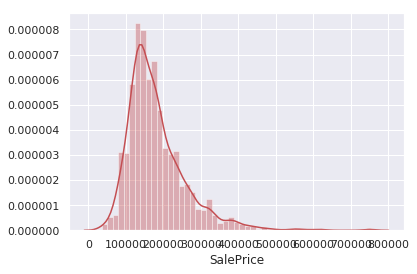

In [37]:
# Distribution of Features

arr = dataset["SalePrice"].unique()
# print("Price data : ", arr)
print("SalePrice data : Min", arr.min())
print("SalePrice data : Max", arr.max())
print("SalePrice data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.SalePrice, color="r", hist=True, kde=True)


### About OverallQual Feature

1. Normal distribution 
2. OverallQual data : Min 1
3. OverallQual data : Max 10
4. OverallQual data : Mean 5.5

OverallQual data : Min 1
OverallQual data : Max 10
OverallQual data : Mean 5.5


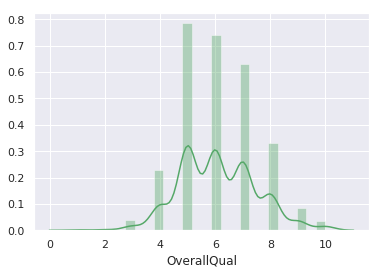

In [38]:
# Distribution of Features

arr = dataset["OverallQual"].unique()
# print("Price data : ", arr)
print("OverallQual data : Min", arr.min())
print("OverallQual data : Max", arr.max())
print("OverallQual data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.OverallQual, color="g", hist=True, kde=True)

### About GrLivArea Feature

1. Normal distribution 
2. GrLivArea data : Min 334
3. GrLivArea data : Max 5642
4. GrLivArea data : Mean 1620.993031358885

GrLivArea data : Min 334
GrLivArea data : Max 5642
GrLivArea data : Mean 1620.993031358885


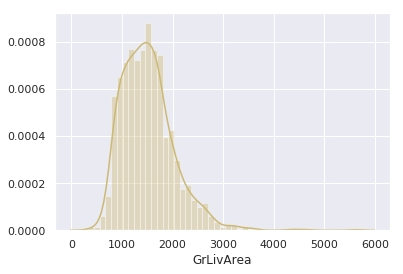

In [39]:
# Distribution of Features

arr = dataset["GrLivArea"].unique()
# print("GrLivArea : ", arr)
print("GrLivArea data : Min", arr.min())
print("GrLivArea data : Max", arr.max())
print("GrLivArea data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.GrLivArea, color="y", hist=True, kde=True)

### About TotalBsmtSF

1. Norml distributed and Right skewed
2. TotalBsmtSF data : Min 0
3. TotalBsmtSF data : Max 6110
4. TotalBsmtSF data : Mean 1187.0166435506242

TotalBsmtSF data : Min 0
TotalBsmtSF data : Max 6110
TotalBsmtSF data : Mean 1187.0166435506242


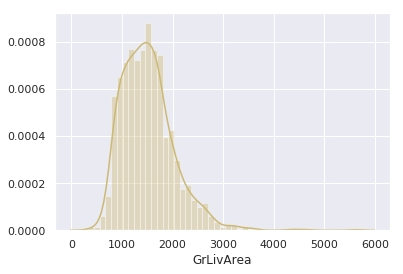

In [43]:
# Distribution of Features

arr = dataset["TotalBsmtSF"].unique()
# print("TotalBsmtSF : ", arr)
print("TotalBsmtSF data : Min", arr.min())
print("TotalBsmtSF data : Max", arr.max())
print("TotalBsmtSF data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.GrLivArea, color="y", hist=True, kde=True)

### About GarageCars Feature

1. Normal distribution 
2. GarageCars data : Min 0
3. GarageCars data : Max 4
4. GarageCars data : Mean 2.0

GarageCars data : Min 0
GarageCars data : Max 4
GarageCars data : Mean 2.0


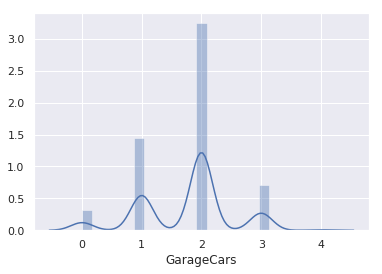

In [40]:
# Distribution of Features

arr = dataset["GarageCars"].unique()
# print("GrLivArea : ", arr)
print("GarageCars data : Min", arr.min())
print("GarageCars data : Max", arr.max())
print("GarageCars data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.GarageCars, color="b", hist=True, kde=True)

### Verify relateion between all indipendet variable and SalePrice

All indipendent feature's are very correlated with SalePrice feature

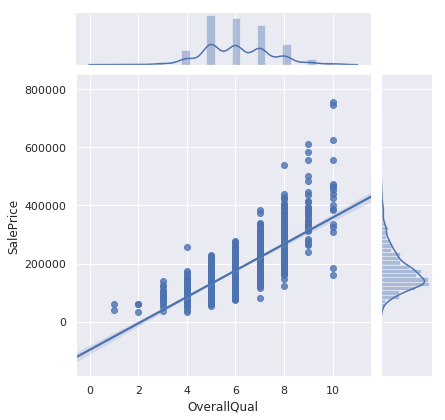

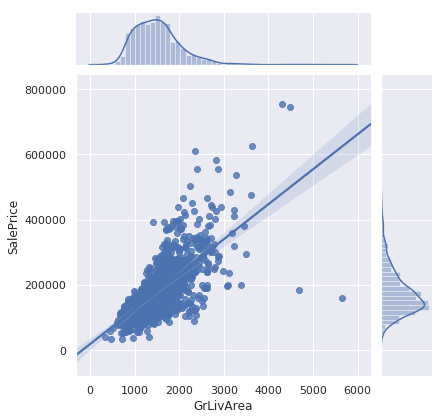

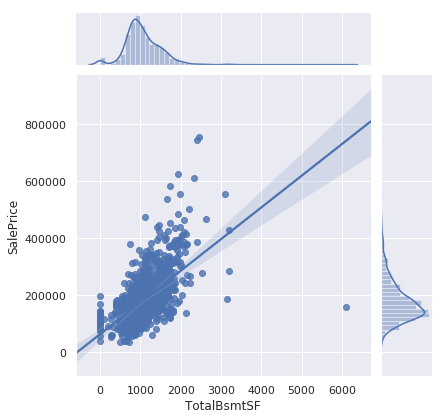

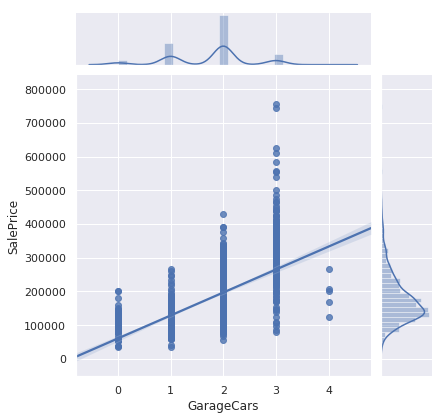

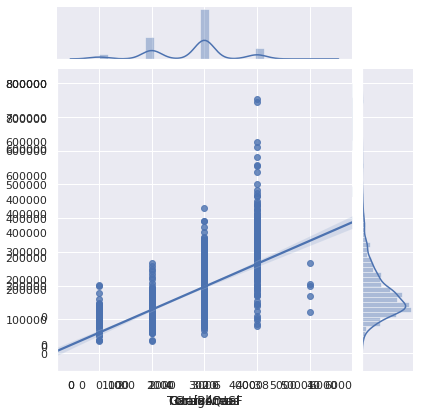

In [46]:
JG1 = sns.jointplot("OverallQual", "SalePrice", data=dataset, kind='reg')
JG2 = sns.jointplot("GrLivArea", "SalePrice", data=dataset, kind='reg')
JG3 = sns.jointplot("TotalBsmtSF", "SalePrice", data=dataset, kind='reg')
JG4 = sns.jointplot("GarageCars", "SalePrice", data=dataset, kind='reg')
#subplots migration
f = plt.figure()
for J in [JG1,JG2,JG3,JG4]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

### Visualise correlation between Independent and SalePrice feature

Could see a good coorelation among dependent and Independent variables.

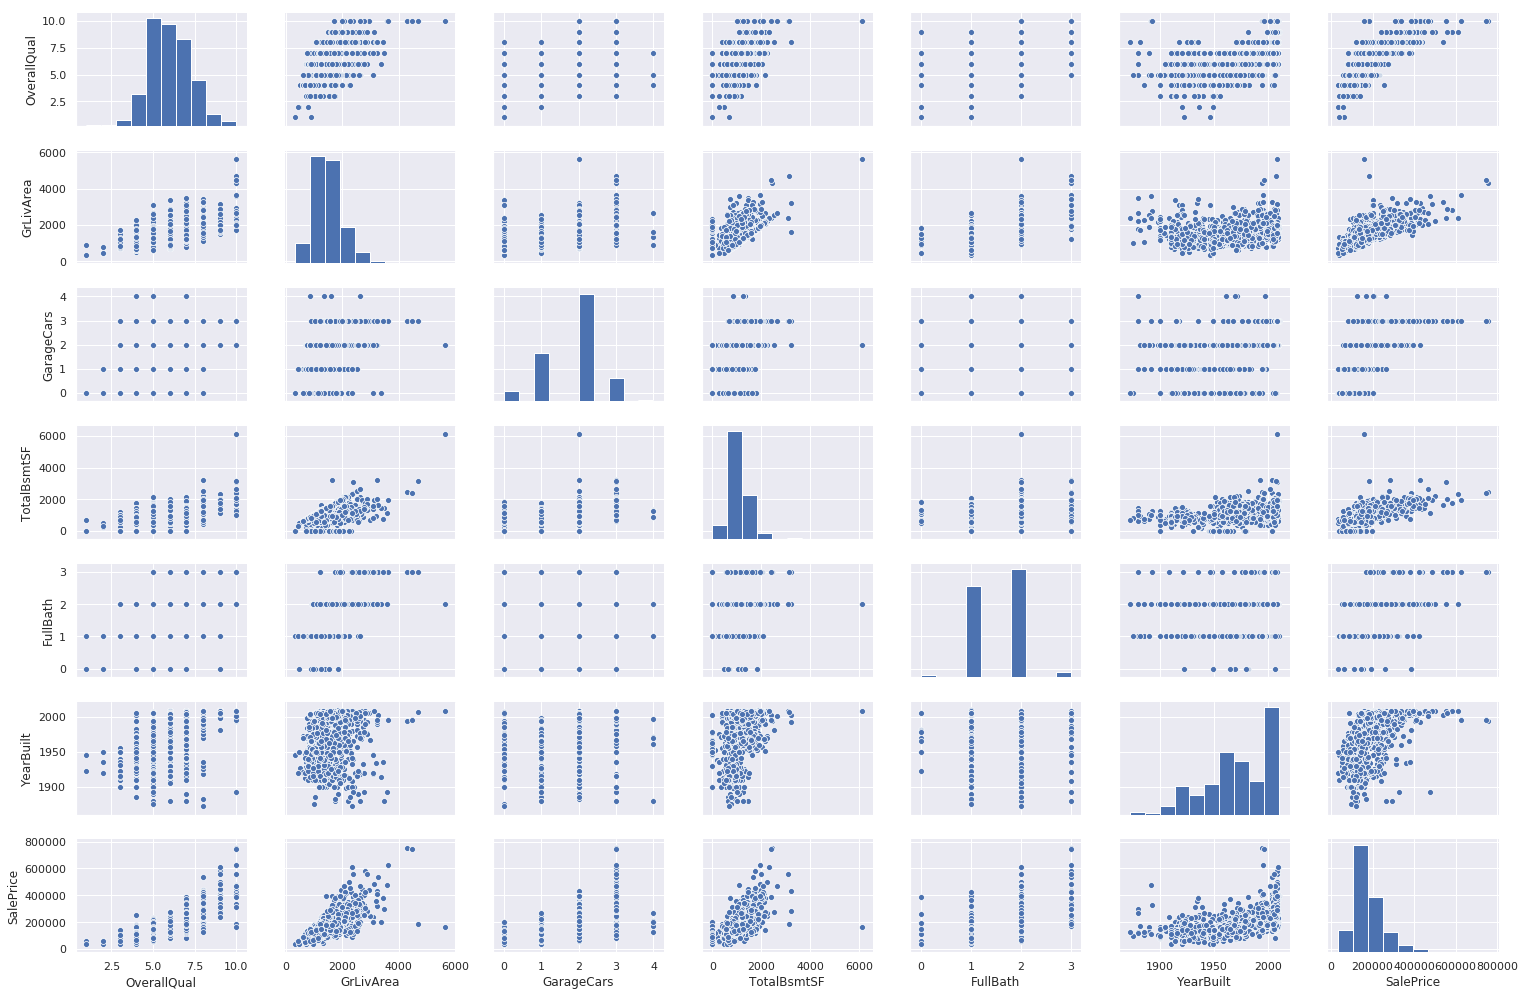

In [128]:
sns.pairplot(dataset, size = 2, aspect = 1.5)

## Algorithm

#### Preparing X and y using Pandas

##### Standardization
Standardize features by removing the mean and scalling to unit standard deviation

In [129]:
from sklearn.preprocessing import StandardScaler
  
scaler = StandardScaler().fit(dataset)
print("", dataset.head(1))
data1 = scaler.transform(dataset)
data = pd.DataFrame(data1)
data.head()

     OverallQual  GrLivArea  GarageCars  ...  FullBath  YearBuilt  SalePrice
Id                                      ...                                
1             7       1710           2  ...         2       2003     208500

[1 rows x 7 columns]


,0,1,2,3,4,5,6
0,0.651479,0.370333,0.311725,-0.459303,0.789741,1.050994,0.347273
1,-0.071836,-0.482512,0.311725,0.466465,0.789741,0.156734,0.007288
2,0.651479,0.515013,0.311725,-0.313369,0.789741,0.984752,0.536154
3,0.651479,0.383659,1.650307,-0.687324,-1.026041,-1.863632,-0.515281
4,1.374795,1.299326,1.650307,0.199680,0.789741,0.951632,0.869843


In [130]:
data.columns = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,0.651479,0.370333,0.311725,-0.459303,0.789741,1.050994,0.347273
1,-0.071836,-0.482512,0.311725,0.466465,0.789741,0.156734,0.007288
2,0.651479,0.515013,0.311725,-0.313369,0.789741,0.984752,0.536154
3,0.651479,0.383659,1.650307,-0.687324,-1.026041,-1.863632,-0.515281
4,1.374795,1.299326,1.650307,0.199680,0.789741,0.951632,0.869843


In [175]:
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
 feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF']
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars']
#  feature_cols = ['OverallQual','GrLivArea']
X = data[feature_cols]
print("Type of X : ", type(X))
print("Shape of X : ", X.shape)

Type of X :  <class 'pandas.core.frame.DataFrame'>
Shape of X :  (1460, 4)


In [176]:
y = data.SalePrice
print("Head of y : ", y.head(2))
print("Type of y : ", type(y))
print("Shape of y : ", y.shape)

Head of y :  0    0.347273
1    0.007288
Name: SalePrice, dtype: float64
Type of y :  <class 'pandas.core.series.Series'>
Shape of y :  (1460,)


##### Splitting X and y into Training and Test Data

In [177]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)
  
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 4)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 4)
y_test shape:  (292,)


#### Linear Regression



In [0]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))
        
#         print("End of the Function")

    return linreg

In [179]:
print("Feature cols : ", feature_cols)
X = data[feature_cols]  
y = data.SalePrice
linreg = linear_reg(X,y)
print("End")

Feature cols :  ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
End


In [180]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.004294446634896643
Coefficients: [0.41053494 0.26743789 0.19648607 0.17115571]


In [181]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.004294446634896643
OverallQual 0.41053494453289635
GrLivArea 0.2674378860670598
GarageCars 0.19648606757445816
TotalBsmtSF 0.17115571039729535


In [182]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test) 
print("end")

end


In [183]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.3195495225467711
MAE for test set is 0.3120654446557433


In [184]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.24645046145609692
MSE for test set is 0.21661236088553074


In [185]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.4964377719876852
RMSE for test set is 0.4654163307035226
